<a href="https://colab.research.google.com/github/mintijha/The-Kenko-Life/blob/main/The_Kenko_Life_Assignment_Minti_Jha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Read File**

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/TKL Assignment.xlsx')

In [ ]:
# Show Data Frmae
df.head(5)

,Client Name,cancelFlag,eveningDeliveryFlag,Status,no_of_boxes,meal_chosen,Vegnonveg,Macro Carb,Macro Carb 2,Macro Protein,...,Fri V1,Fri V2,Sat C1,Sat C2,Sat PV1,Sat PV2,Sat PN1,Sat PN2,Sat V1,Sat V2
0,Client 133,NaN,NaN,Active,1,Lunch,Non-Veg,NaN,180.0,180.0,...,130.0,130.0,180.0,180.0,180.0,180.0,180.0,180.0,130.0,130.0
1,Client 183,Y,NaN,Active,2,Lunch & Dinner,Non-Veg,NaN,150.0,150.0,...,120.0,120.0,150.0,150.0,NaN,NaN,150.0,150.0,120.0,120.0
2,Client 5,Y,Yes,Active,1,Dinner,Veg,NaN,140.0,NaN,...,NaN,110.0,NaN,140.0,NaN,130.0,NaN,NaN,NaN,110.0
3,Client 24,NaN,NaN,Active,1,Dinner,Non-Veg,NaN,140.0,NaN,...,NaN,120.0,NaN,140.0,NaN,NaN,NaN,150.0,NaN,120.0
4,Client 25,NaN,NaN,Active,1,Dinner,Mix-It-Up!,NaN,180.0,NaN,...,NaN,120.0,NaN,140.0,NaN,150.0,NaN,150.0,NaN,120.0


In [ ]:
# show columns names
df.columns

Index(['Client Name', 'cancelFlag', 'eveningDeliveryFlag', 'Status',
       'no_of_boxes', 'meal_chosen', 'Vegnonveg', 'Macro Carb', 'Macro Carb 2',
       'Macro Protein', 'Macro Protein 2', 'Macro Fibre', 'Macro Fibre 2',
       'Macro Fat 1', 'Macro Fat 2', 'Monday M 1 Chosen', 'Monday M 2 Chosen',
       'Tuesday M 1 Chosen', 'Tuesday M 2 Chosen', 'Wednesday M 1 Chosen',
       'Wednesday M 2 Chosen', 'Thursday M 1 Chosen', 'Thursday M 2 Chosen',
       'Friday M 1 Chosen', 'Friday M 2 Chosen', 'Saturday M 1 Chosen',
       'Saturday M 2 Chosen', 'Mon C1', 'Mon C2', 'Mon PV1', 'Mon PV2',
       'Mon PN1', 'Mon PN2', 'Mon V1', 'Mon V2', 'Tue C1', 'Tue C2', 'Tue PV1',
       'Tue PV2', 'Tue PN1', 'Tue PN2', 'Tue V1', 'Tue V2', 'Wed C1', 'Wed C2',
       'Wed PV1', 'Wed PV2', 'Wed PN1', 'Wed PN2', 'Wed V1', 'Wed V2', 'Th C1',
       'Th C2', 'ThPV1', 'thPV2', 'thPn1', 'thPn2', 'thV1', 'thV2', 'Fri C1',
       'Fri C2', 'Fri PV1', 'Fri PV2', 'Fri PN1', 'Fri PN2', 'Fri V1',
       'Fri 

 **value counts before the changes:**

In [ ]:
# List of the "M 1 Chosen" and "M 2 Chosen" columns for each day
m1_m2_columns = [
    'Monday M 1 Chosen', 'Monday M 2 Chosen',
    'Tuesday M 1 Chosen', 'Tuesday M 2 Chosen',
    'Wednesday M 1 Chosen', 'Wednesday M 2 Chosen',
    'Thursday M 1 Chosen', 'Thursday M 2 Chosen',
    'Friday M 1 Chosen', 'Friday M 2 Chosen',
    'Saturday M 1 Chosen', 'Saturday M 2 Chosen'
]

# Loop through each column and print the value counts
for col in m1_m2_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")


Value counts for Monday M 1 Chosen:
Monday M 1 Chosen
Veg    1
Name: count, dtype: int64


Value counts for Monday M 2 Chosen:
Monday M 2 Chosen
Non-Veg    6
Veg        3
Name: count, dtype: int64


Value counts for Tuesday M 1 Chosen:
Tuesday M 1 Chosen
Non-Veg    1
Name: count, dtype: int64


Value counts for Tuesday M 2 Chosen:
Tuesday M 2 Chosen
Non-Veg    6
Veg        4
Name: count, dtype: int64


Value counts for Wednesday M 1 Chosen:
Wednesday M 1 Chosen
Non-Veg    1
Veg        1
Name: count, dtype: int64


Value counts for Wednesday M 2 Chosen:
Wednesday M 2 Chosen
Non-Veg    6
Veg        4
Name: count, dtype: int64


Value counts for Thursday M 1 Chosen:
Thursday M 1 Chosen
Non-Veg    2
Name: count, dtype: int64


Value counts for Thursday M 2 Chosen:
Thursday M 2 Chosen
Non-Veg    6
Veg        5
Name: count, dtype: int64


Value counts for Friday M 1 Chosen:
Friday M 1 Chosen
Veg    2
Name: count, dtype: int64


Value counts for Friday M 2 Chosen:
Friday M 2 Chosen
Veg       

# **Question 1**
If 'Vegnonveg' is Veg / Non-Veg, Fill the following variables with respective values based on 'meal_chosen'. (In blue)
(If it is Mix-It-Up!, leave it blank.)
Eg. If Non-Veg & Lunch are chosen, Only M1 Chosen values have to be updated. If Non-Veg & Lunch are chosen, Only M2 Chosen values have to be updated.


In [ ]:
def update_meals(row, day):

# Define the column names for the meals chosen on the given day
    m1_col = f'{day} M 1 Chosen'
    m2_col = f'{day} M 2 Chosen'

  # Check if the chosen meal is Lunch
    if row['meal_chosen'] == 'Lunch':
        if row['Vegnonveg'] == 'Non-Veg':
            return 'Non-Veg', row[m1_col]
        elif row['Vegnonveg'] == 'Veg':
            return 'Veg', row[m1_col]

    # Check if the chosen meal is Dinner
    elif row['meal_chosen'] == 'Dinner':
        if row['Vegnonveg'] == 'Non-Veg':
            return row[m2_col], 'Non-Veg'
        elif row['Vegnonveg'] == 'Veg':
            return row[m2_col], 'Veg'

    # Check if the chosen meals are both Lunch and Dinner
    elif row['meal_chosen'] == 'Lunch & Dinner':
        if row['Vegnonveg'] == 'Non-Veg':
            return 'Non-Veg', 'Non-Veg'
        elif row['Vegnonveg'] == 'Veg':
            return 'Veg', 'Veg'

    # Default case if no specific meal choice is made
    return row[m1_col], row[m2_col]  # Default case for no specific meal chosen

# List of days to iterate over
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Update the meal choices for each day using the update_meals function
for day in days:
    m1_col = f'{day} M 1 Chosen'                 # Column for the first meal chosen
    m2_col = f'{day} M 2 Chosen'                 # Column for the second meal chosen

# Apply the update_meals function and unpack the results into the respective columns
    df[m1_col], df[m2_col] = zip(*df.apply(update_meals, axis=1, day=day))

# Print the updated DataFrame
print(df)

    Client Name cancelFlag eveningDeliveryFlag  Status no_of_boxes  \
0    Client 133        NaN                 NaN  Active           1   
1    Client 183          Y                 NaN  Active           2   
2      Client 5          Y                 Yes  Active           1   
3     Client 24        NaN                 NaN  Active           1   
4     Client 25        NaN                 NaN  Active           1   
..          ...        ...                 ...     ...         ...   
195  Client 196          Y                 NaN  Active           2   
196  Client 197          Y                 NaN  Active           2   
197  Client 198        NaN                 Yes  Active           2   
198  Client 199        NaN                 Yes  Active           2   
199  Client 200        NaN                 Yes  Active           2   

        meal_chosen   Vegnonveg  Macro Carb  Macro Carb 2  Macro Protein  ...  \
0             Lunch     Non-Veg         NaN         180.0          180.0  ... 

 **value counts After the changes:**

In [ ]:
# List of days to iterate over
days = ['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat']

# List of columns to check
columns = ['C1', 'C2', 'PV1', 'PN1', 'PV2', 'PN2', 'V1', 'V2']

# Loop through each day and each column to print value counts before changes
for day in days:
    print(f"\nValue counts for {day} columns before update:")
    for col in columns:
        column_name = f'{day} {col}'
        if column_name in df.columns:
            print(f"\n{column_name}:")
            print(df[column_name].value_counts())
        else:
            print(f"{column_name} does not exist in DataFrame")


Value counts for Mon columns before update:

Mon C1:
Mon C1
130.0    7
150.0    5
140.0    2
120.0    2
180.0    1
Name: count, dtype: int64

Mon C2:
Mon C2
140.0    3
130.0    3
180.0    1
150.0    1
Name: count, dtype: int64

Mon PV1:
Mon PV1
130.0    4
140.0    3
150.0    2
180.0    1
Name: count, dtype: int64

Mon PN1:
Mon PN1
140.0    5
130.0    4
150.0    3
180.0    2
120.0    1
Name: count, dtype: int64

Mon PV2:
Mon PV2
140.0    2
180.0    1
130.0    1
150.0    1
Name: count, dtype: int64

Mon PN2:
Mon PN2
150.0    4
140.0    2
180.0    1
Name: count, dtype: int64

Mon V1:
Mon V1
120.0    10
110.0     4
100.0     3
130.0     2
150.0     1
140.0     1
Name: count, dtype: int64

Mon V2:
Mon V2
110.0    5
120.0    3
130.0    2
Name: count, dtype: int64

Value counts for Tue columns before update:

Tue C1:
Tue C1
130.0    8
150.0    6
140.0    4
120.0    3
180.0    1
20.0     1
Name: count, dtype: int64

Tue C2:
Tue C2
140.0    5
130.0    3
180.0    1
150.0    1
90.0     1
20.0   

### **Question 2**

 If 'Vegnonveg' is Veg / Non-Veg, Fill the following variables with respective values based on 'meal_chosen' & macros provided for Meal 1 & Meal 2. (In orange)
(If it is Mix-It-Up!, leave it blank.)
Eg. If Non-Veg & Lunch are chosen, Only M1 Chosen values have to be updated. If Non-Veg & Lunch are chosen, Only M2 Chosen values have to be updated.



In [ ]:
def update_meals(row, day):
    # Define column names based on the day
    c1_col = f'{day} C1'
    c2_col = f'{day} C2'
    pv1_col = f'{day} PV1'
    pn1_col = f'{day} PN1'
    pv2_col = f'{day} PV2'
    pn2_col = f'{day} PN2'
    v1_col = f'{day} V1'
    v2_col = f'{day} V2'

    # Default empty return values for all 8 columns
    default_return = '', '', '', '', '', '', '', ''

    # Update based on 'meal_chosen' and 'Vegnonveg'
    if row['Vegnonveg'] == 'Mix-It-Up!':
        # If 'Mix-It-Up!', leave all columns blank
        return default_return

    if row['meal_chosen'] == 'Lunch':
        # Update lunch-related columns (M1)
        if row['Vegnonveg'] == 'Veg':
            return row['Macro Carb'], '', row['Macro Protein'], '', '', '', row['Macro Fibre'], ''
        else:  # Non-Veg
            return row['Macro Carb'], '', '', row['Macro Protein'], '', '', row['Macro Fibre'], ''

    elif row['meal_chosen'] == 'Dinner':
        # Update dinner-related columns (M2)
        if row['Vegnonveg'] == 'Veg':
            return '', row['Macro Carb 2'], '', '', row['Macro Protein 2'], '', '', row['Macro Fibre 2']
        else:  # Non-Veg
            return '', row['Macro Carb 2'], '', '', '', row['Macro Protein 2'], '', row['Macro Fibre 2']

    elif row['meal_chosen'] == 'Lunch & Dinner':
        # Update both lunch and dinner columns
        if row['Vegnonveg'] == 'Veg':
            return (row['Macro Carb'], row['Macro Carb 2'], row['Macro Protein'], '',
                    row['Macro Protein 2'], '', row['Macro Fibre'], row['Macro Fibre 2'])
        else:  # Non-Veg
            return (row['Macro Carb'], row['Macro Carb 2'], '', row['Macro Protein'],
                    '', row['Macro Protein 2'], row['Macro Fibre'], row['Macro Fibre 2'])

    # Default return for missing conditions
    return default_return

In [ ]:
# List of days for which we need to update the columns
days = ['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat']

for day in days:
    c1_col = f'{day} C1'
    c2_col = f'{day} C2'
    pv1_col = f'{day} PV1'
    pn1_col = f'{day} PN1'
    pv2_col = f'{day} PV2'
    pn2_col = f'{day} PN2'
    v1_col = f'{day} V1'
    v2_col = f'{day} V2'

    # Apply the update_meals function row-wise and unpack the result into the 8 columns
    df[[c1_col, c2_col, pv1_col, pn1_col, pv2_col, pn2_col, v1_col, v2_col]] = pd.DataFrame(
        df.apply(update_meals, axis=1, day=day).to_list(), index=df.index
    )

 **value counts After the changes:**

In [ ]:
# List of days to iterate over
days = ['Mon', 'Tue', 'Wed', 'Th', 'Fri', 'Sat']

# List of columns to check
columns = ['C1', 'C2', 'PV1', 'PN1', 'PV2', 'PN2', 'V1', 'V2']

# Loop through each day and each column to print value counts before changes
for day in days:
    print(f"\nValue counts for {day} columns before update:")
    for col in columns:
        column_name = f'{day} {col}'
        if column_name in df.columns:
            print(f"\n{column_name}:")
            print(df[column_name].value_counts())
        else:
            print(f"{column_name} does not exist in DataFrame")


Value counts for Mon columns before update:

Mon C1:
Mon C1
         85
130.0    30
140.0    23
150.0    19
120.0    14
180.0     4
250.0     3
160.0     3
90.0      2
50.0      2
170.0     2
80.0      2
100.0     2
60.0      1
200.0     1
110.0     1
20.0      1
Name: count, dtype: int64

Mon C2:
Mon C2
         127
140.0     20
130.0     20
150.0      8
120.0      8
100.0      3
200.0      2
90.0       1
250.0      1
160.0      1
180.0      1
80.0       1
Name: count, dtype: int64

Mon PV1:
Mon PV1
         178
130.0      7
120.0      4
140.0      4
150.0      3
70.0       1
110.0      1
160.0      1
Name: count, dtype: int64

Mon PN1:
Mon PN1
         107
140.0     26
150.0     23
130.0     19
120.0      8
160.0      6
180.0      4
200.0      3
250.0      1
110.0      1
220.0      1
100.0      1
Name: count, dtype: int64

Mon PV2:
Mon PV2
         179
140.0      7
130.0      5
150.0      4
120.0      3
Name: count, dtype: int64

Mon PN2:
Mon PN2
         148
140.0     21
150.0     

####**Export file**

In [ ]:
# Define the output file path and name
output_file = "updated_meal_data.xlsx"

# Export the DataFrame to an Excel file without the index column
df.to_excel(output_file, index=False)

# Print a success message with the file path
print(f"Data exported successfully to {output_file}")

# Optional: If you need to specify a specific path, update the output_file variable
output_file = "C:/path_to_your_folder/updated_meal_data.xlsx"

Data exported successfully to updated_meal_data.xlsx


### **EDA**

#1  **Nutritional Analysis**

Question: "What is the average Macro Carb and Macro Protein content in Veg vs. Non-Veg meals?


In [ ]:
macro_carb_cols = ['Macro Carb', 'Macro Carb 2']
macro_protein_cols = ['Macro Protein', 'Macro Protein 2']

# Calculate average Macro Carb and Macro Protein
df['Average_Macro_Carb'] = df[macro_carb_cols].mean(axis=1)
df['Average_Macro_Protein'] = df[macro_protein_cols].mean(axis=1)

# Separate Veg and Non-Veg data
veg_data = df[df['Vegnonveg'] == 'Veg']
non_veg_data = df[df['Vegnonveg'] == 'Non-Veg']

# Calculate averages
avg_veg_carb = veg_data['Average_Macro_Carb'].mean()
avg_veg_protein = veg_data['Average_Macro_Protein'].mean()

avg_non_veg_carb = non_veg_data['Average_Macro_Carb'].mean()
avg_non_veg_protein = non_veg_data['Average_Macro_Protein'].mean()

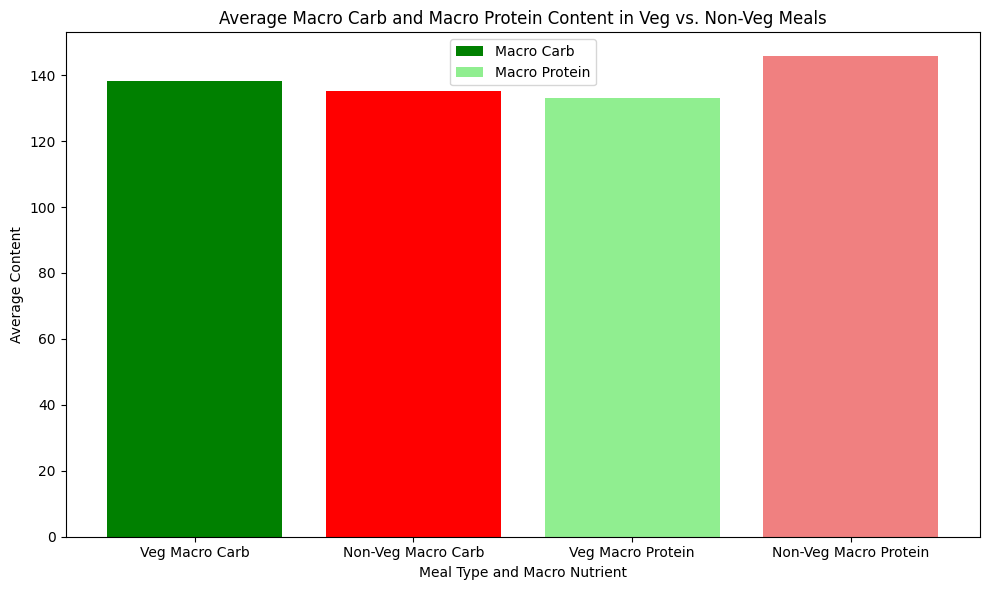

In [ ]:
# Plot the averages for Macro Carb and Macro Protein
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Macro Carb
ax.bar(['Veg Macro Carb', 'Non-Veg Macro Carb'], [avg_veg_carb, avg_non_veg_carb], color=['green', 'red'], label='Macro Carb')

# Plot Macro Protein
ax.bar(['Veg Macro Protein', 'Non-Veg Macro Protein'], [avg_veg_protein, avg_non_veg_protein], color=['lightgreen', 'lightcoral'], label='Macro Protein')

plt.title('Average Macro Carb and Macro Protein Content in Veg vs. Non-Veg Meals')
plt.ylabel('Average Content')
plt.xlabel('Meal Type and Macro Nutrient')
plt.legend()
plt.tight_layout()
plt.show()


####**Insights:**
**Vegetarians consume more carbs:** The average carb content in vegetarian meals is higher than that in non-vegetarian meals.

**Non-vegetarians consume more protein:** The average protein content in non-vegetarian meals is higher than that in vegetarian meals.
Possible

####**positive impacts:**

**Higher protein intake for non-vegetarians**: This could be beneficial for muscle growth, repair, and overall health.

**Higher carb intake for vegetarians:** This could provide more energy and support digestive health.
Possible

####**negative impacts:**

**Potential for excess carbs for vegetarians:** This could lead to weight gain or health issues like type 2 diabetes if not managed well.

**Potential for insufficient carbs for non-vegetarians:** This could lead to fatigue, muscle breakdown, and impaired cognitive function.

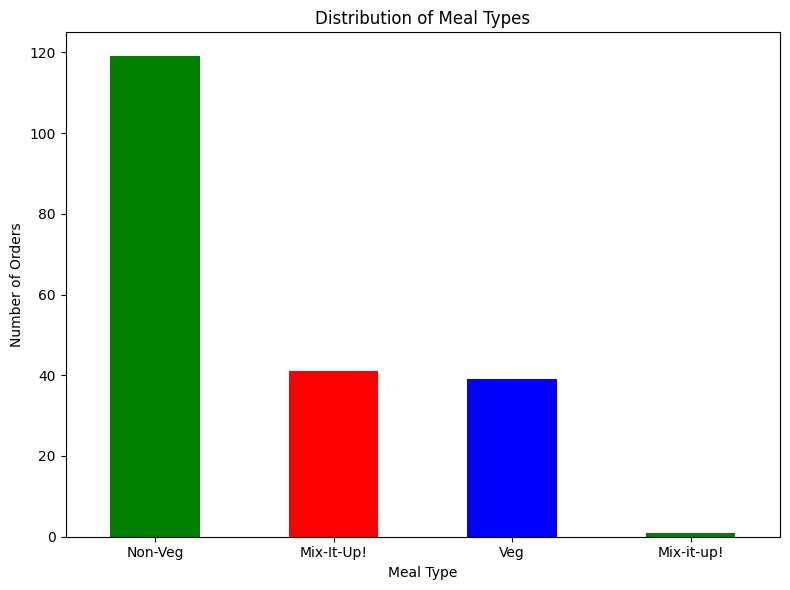

In [ ]:
#2. Distribution of Meal Types (Veg vs Non-Veg)

meal_counts = df['Vegnonveg'].value_counts()
plt.figure(figsize=(8, 6))
meal_counts.plot(kind='bar', color=['green', 'red', 'blue'])  # Adjust colors if needed
plt.title('Distribution of Meal Types')
plt.xlabel('Meal Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### **Insights:**

The graph shows the average content of macronutrients (carbohydrates and protein) in vegetarian and non-vegetarian meals. The average macro carb content of vegetarian meals is around 140, while the average macro carb content of non-vegetarian meals is around 135. The average macro protein content of vegetarian meals is around 135, while the average macro protein content of non-vegetarian meals is around 145.

####**Positive Impacts:**
Vegetarian Meals: High carbohydrate content can provide sustained energy levels.
Non-Vegetarian Meals: High protein content can be beneficial for muscle growth and repair.

####**Negative Impacts:**

Vegetarian Meals: A high carbohydrate diet, if not balanced, can lead to blood sugar spikes and potential health issues.
Non-Vegetarian Meals: Excessive protein intake can put a strain on the kidneys and can lead to other health issues.

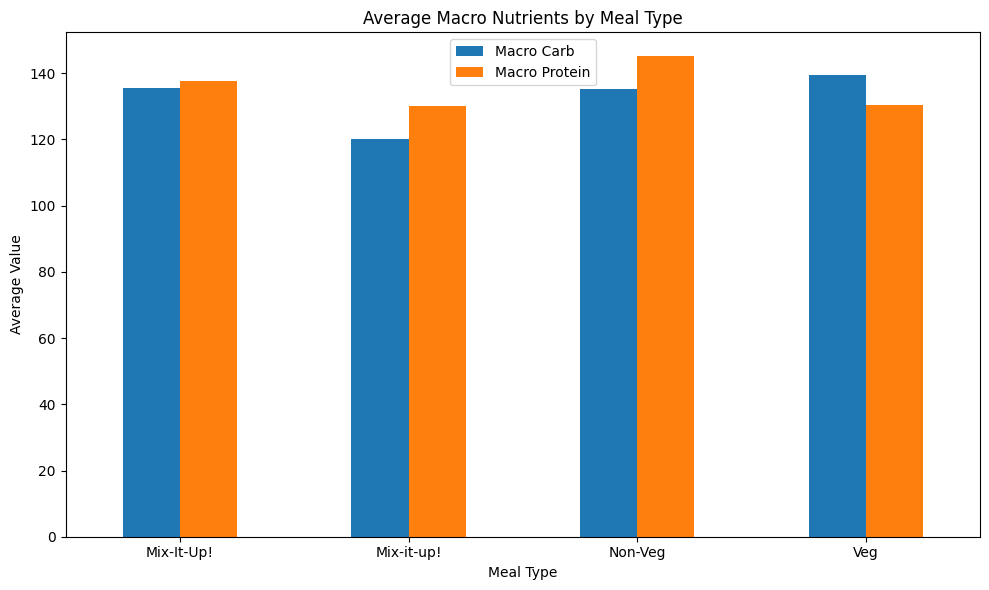

In [ ]:
# 3.Average Macro Nutrients (Carbs, Protein) by Meal Type

# Group by meal type and calculate averages
average_macros = df.groupby('Vegnonveg').agg({'Macro Carb': 'mean', 'Macro Protein': 'mean'}).reset_index()

# Plot average macro nutrients
average_macros.plot(kind='bar', x='Vegnonveg', figsize=(10, 6))
plt.title('Average Macro Nutrients by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

####**Insights:**

The graph shows that vegetarian meals tend to have higher carbohydrate content than non-vegetarian meals, while non-vegetarian meals tend to have higher protein content.

####**Possible Positive Impacts:**

Higher carb intake in vegetarian meals: This could be beneficial for individuals looking to increase their intake of fiber, vitamins, and minerals, which are often abundant in plant-based foods.
Higher protein intake in non-vegetarian meals: This could be beneficial for individuals who need more protein for muscle growth and repair, particularly athletes and those who are physically active.

####**Possible Negative Impacts:**

High carb intake in vegetarian meals: Individuals with diabetes or insulin resistance may need to be mindful of their carbohydrate intake to manage blood sugar levels effectively.
High protein intake in non-vegetarian meals: Consuming too much protein can put a strain on the kidneys and can also lead to deficiencies in other essential nutrients if not balanced properly.

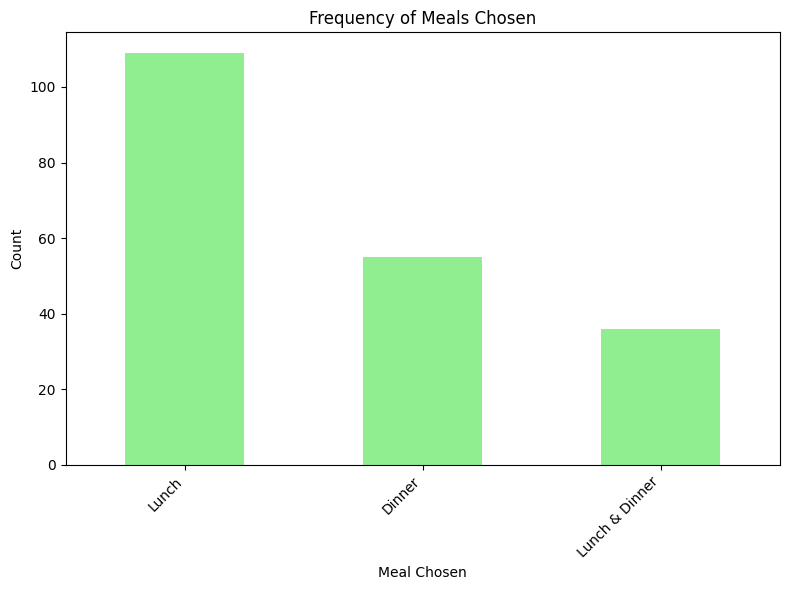

In [ ]:
# Meal Chosen Frequency

# Plot the frequency of meal types chosen
plt.figure(figsize=(8, 6))
df['meal_chosen'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of Meals Chosen')
plt.xlabel('Meal Chosen')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


####**Impact:**

The graph provides valuable insights for understanding meal preferences. It highlights the demand for Dinner and suggests opportunities to increase Lunch popularity. Additionally, the data indicates a potential market for combined meal options

####**Positive Impacts:**
Identifies the most popular meal: The graph clearly shows that "Dinner" is the most frequently chosen meal, providing valuable information for planning and catering services.

Reveals trends in meal combinations: The "Lunch & Dinner" category suggests that there is a demand for combined meal options, which could be leveraged to create new offerings.

####**Negative Impacts:**
Highlights the least popular meal: "Lunch" is the least frequently chosen meal, suggesting that there may be opportunities to increase its popularity through targeted marketing or menu changes.